In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from sklearn.cross_validation import cross_val_score
from skmultilearn.adapt import MLkNN
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import re

In [2]:
plans2015=pd.read_excel("PY2015_Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [3]:
NM2015=pd.read_excel("PY2015_NM-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
NV2015=pd.read_excel("PY2015_NV-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")
OR2015=pd.read_excel("PY2015_OR-Med-Indi-Land-08-13-2015.xlsx", parse_cols="A:J, H, X, BG")

In [4]:
plans2015=plans2015.append(NM2015)
plans2015=plans2015.append(NV2015)
plans2015=plans2015.append(OR2015)

In [5]:
plans2016=pd.read_excel("PY2016_Med-Indi-Land-07-29-2016.xlsx", parse_cols="A:J, H, X, BG")
plans2017=pd.read_excel("PY2017_Individual_Market_Medical_05_10_2017.xlsx", parse_cols="A:J, H, X, BG")


In [6]:
plans2014=pd.read_excel("Individual_Market_Medical_8_11_14.xlsx", parse_cols="A:J, H, W, BF")
NM2014=pd.read_excel("NM_Individual_Market_Medical_8_11_14.xlsx", parse_cols="A:J, H, W, BF")
plans2014=plans2014.append(NM2014)

In [7]:
Edu = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S1501_with_ann.csv", skiprows=1)
Uninsured=pd.read_csv("Texas Health Insurance/ACS_15_5YR_S2701_with_ann.csv", skiprows=1)
Pop = pd.read_csv("Texas Health Insurance/ACS_15_5YR_S0101_with_ann.csv", skiprows=1)
Employment = pd.read_csv("Texas Health Insurance/ACS_15_5YR_DP03_with_ann.csv", skiprows=1)
HealthRankings=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Ranked Measure Data", skiprows=1)
HealthRankings2=pd.read_excel("Texas Health Insurance/2015 County Health Rankings Texas Data - v3.xls", "Additional Measure Data", skiprows=1)

In [8]:
hospitals=pd.read_csv("tabula-hosplis2016.csv")
FIPS=pd.read_excel("TexasFIPS.xlsx", skiprows=1)
TXplans2015=plans2015[plans2015["State "]=="TX"]
TXplans2015["Premium Adult Individual Age 27"]=TXplans2015["Premium Adult Individual Age 27"].astype(str).astype(float)
TXplans2015["Premium Adult Individual Age 27"]=TXplans2015["Premium Adult Individual Age 27"].astype(str).astype(float)

C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\slee7268\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
hospitals=hospitals[["Facility", "County", "Beds", "Beds.1", "Ownership"]]
hospitals=hospitals.rename(columns={"Beds.1":"Psychiatric Beds"})

In [10]:
hospitals["County"]
x=[]
for i in hospitals["County"]:
    x.append(i)

d=[]
for j in x:
    d.append(re.sub(r'\d+', '', j))

#uppercase
r=[]
for l in d:
    r.append(re.sub('[^A-Z]', '', l))

#alphanumeric
s=[]
for k in r:
    s.append(re.sub(r'[^\w]', '', k))
f=[]
for p in s:
    f.append(p.title())

hospitals["Counties"]=pd.Series(f)

In [11]:
hospitals=hospitals.replace("Jimwells", "Jim Wells")
hospitals=hospitals.replace("Elpaso", "El Paso")
hospitals=hospitals.replace("Sanpatricio", "San Patricio")
hospitals=hospitals.replace("Dewitt", "DeWitt")
hospitals=hospitals.replace("Valverde", "Val Verde")
hospitals=hospitals.replace("Vanzandt", "Van Zandt")
hospitals=hospitals.replace("Tomgreen", "Tom Green")
hospitals=hospitals.replace("Throckmort", "Throckmorton")
hospitals=hospitals.replace("Sanaugustine", "San Augustine")
hospitals=hospitals.replace("Nbharris", "Harris")
hospitals=hospitals.replace("Ngrimes", "Grimes")
hospitals=hospitals.replace("Mcculloch", "McCulloch")
hospitals=hospitals.replace("Mclennan", "McLennan")
hospitals=hospitals.replace("Palopinto", "Palo Pinto")
hospitals=hospitals.replace("Nacogdoche", "Nacogdoches")
hospitals=hospitals.replace("Fortbend", "Fort Bend")
hospitals=hospitals.replace("Deafsmith", "Deaf Smith")


UniqueFacilities=hospitals.groupby("Counties")["Facility"].nunique().reset_index()

Beds=hospitals.groupby("Counties")["Beds"].sum().reset_index()


In [12]:
FIPS=FIPS.rename(columns={"County.1": "County", "County": "County Number"})

In [13]:
FIPS.head()

,Number,Name,Code,Region,Region.1
0,1,Anderson,48001,4,4/5N
1,2,Andrews,48003,9,2017-09-10 00:00:00
2,3,Angelina,48005,5,4/5N
3,4,Aransas,48007,11,11
4,5,Archer,48009,2,2017-02-03 00:00:00


In [14]:
x=[]
for i, row in Edu["Geography"].iteritems():
    x.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Edu["County"]=pd.Series(x)
Edu=Edu[["County", "Total; Estimate; MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Population 25 years and over with earnings", "Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Associate's degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Total; Estimate; Population 65 years and over"]]

In [15]:
y=[]
for i, row in Uninsured["Geography"].iteritems():
    y.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Uninsured["County"]=pd.Series(y)
Uninsured=Uninsured[["County", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years"]]

In [16]:
z=[]
for i, row in Employment["Geography"].iteritems():
    z.append(row.strip().split(",")[0].rsplit(" ", 1)[0])
    
Employment["County"]=pd.Series(z)
Employment=Employment[["County", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)"]]

In [17]:
HealthRankings=HealthRankings[["County", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems"]]
HealthRankings2=HealthRankings2[["County", "% Hispanic", "% African American", "% Rural", "% Diabetic", "HIV Prevalence Rate", "Age-Adjusted Mortality", "% Food Insecure", "Costs"]]

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


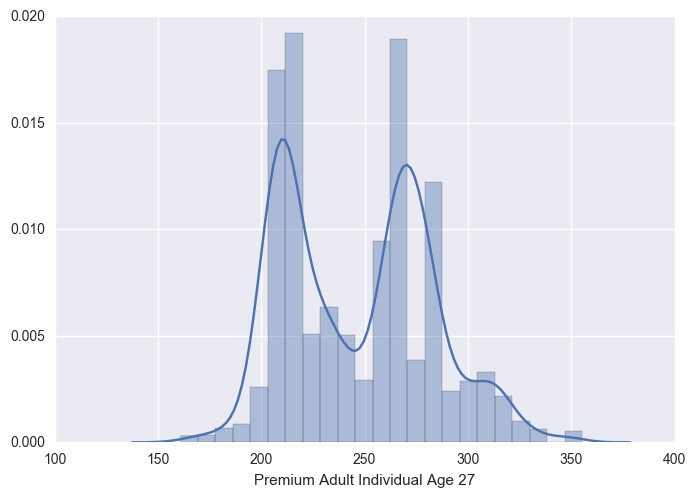

In [18]:
sns.distplot(TXplans2015[TXplans2015["Metal Level"]=="Silver"]["Premium Adult Individual Age 27"])

In [19]:
BronzeTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Bronze"]
SilverTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Silver"]
GoldTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Gold"]
PlatinumTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Platinum"]
CatastrophicTXPlans2015=TXplans2015[TXplans2015["Metal Level"]=="Catastrophic"]

DependentBronze=BronzeTXPlans2015[["Metal Level", "Issuer Name", "Plan ID (standard component)", "Plan Type",  "Rating Area", "County", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard"]]
DependentSilver=SilverTXPlans2015[["Metal Level", "Issuer Name", "Plan ID (standard component)", "Plan Type",  "Rating Area", "County", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard"]]


In [20]:

NumberOfIssuersBronze=DependentBronze.groupby(["Metal Level", "Rating Area", "County"])["Issuer Name"].nunique().reset_index()

#DependentBronze=DependentBronze.groupby(["Metal Level", "Rating Area", "County"], as_index=False).mean()
NumberOfIssuersSilver=DependentSilver.groupby(["Metal Level", "Rating Area", "County"])["Issuer Name"].nunique().reset_index()
#DependentSilver=DependentSilver.groupby(["Metal Level", "Rating Area", "County"], as_index=False).mean()

DependentBronze = pd.merge(DependentBronze, NumberOfIssuersBronze, how='left', on=['County'])

#DependentBronze=DependentBronze[["Metal Level_x", "Issuer Name_x", "Plan ID (standard component)", "Plan Type", "Rating Area_x", "County", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard", "Issuer Name_y", "Florida Blue (BlueCross BlueShield FL)", "Florida Blue HMO (a BlueCross BlueShield FL company)", "Cigna Healthcare", "Florida Health Care Plans", "Health First Health Plans, Inc.", "Health First Insurance, Inc.", "Humana, Inc.", "Molina Marketplace", "UnitedHealthcare", "Coventry Health Care of Florida, Inc.", "Ambetter from Sunshine Health", "Aetna", "EPO", "HMO", "POS", "PPO"]]

#DependentSilver=pd.merge(DependentSilver, groupedCatVars, how="left", on=["Rating Area"])
DependentSilver=pd.merge(DependentSilver, NumberOfIssuersSilver, how="left", on =["County"])
#DependentSilver=DependentSilver[["Metal Level_x", "Issuer Name_x", "Plan ID (standard component)", "Plan Type", "Rating Area_x", "County", "Premium Adult Individual Age 27", "Medical Deductible-individual-standard", "Issuer Name_y", "Florida Blue (BlueCross BlueShield FL)", "Florida Blue HMO (a BlueCross BlueShield FL company)", "Cigna Healthcare", "Florida Health Care Plans", "Health First Health Plans, Inc.", "Health First Insurance, Inc.", "Humana, Inc.", "Molina Marketplace", "UnitedHealthcare", "Coventry Health Care of Florida, Inc.", "Ambetter from Sunshine Health", "Aetna", "EPO", "HMO", "POS", "PPO"]]
#DependentSilver=pd.merge(DependentSilver, groupedCatVars, how="left", on=["Rating Area"])

DependentBronze=DependentBronze.rename(columns={"Metal Level_x":"Metal Level", "Issuer Name_x": "Issuer Name", "Rating Area_x": "Rating Area", "Issuer Name_y": "Number Of Insurers"})
DependentSilver=DependentSilver.rename(columns={"Metal Level_x":"Metal Level", "Issuer Name_x": "Issuer Name", "Rating Area_x": "Rating Area", "Issuer Name_y": "Number Of Insurers"})

In [21]:
catVars=pd.get_dummies(TXplans2015["Issuer Name"]).join(pd.get_dummies(TXplans2015["Plan Type"])).join(pd.get_dummies(TXplans2015["Rating Area"]))
#BronzeTXPlans2015=BronzeTXPlans2015.join(catVars)
#SilverTXPlans2015=SilverTXPlans2015.join(catVars)

TXplans2015Cat=TXplans2015.join(catVars)

In [22]:
catVars=TXplans2015Cat[["County", "Rating Area", "Plan ID (standard component)", "Aetna", "Allegian Choice", "Ambetter from Superior Health Plan", "Blue Cross and Blue Shield of Texas", "Cigna Healthcare", "Community Health Choice", "CommunityFirst", "FirstCare Health Plans", "Humana, Inc.", "Molina Marketplace", "Scott and White Health Plan", "Sendero Health Plans", "UnitedHealthcare", "EPO", "HMO", "POS", "PPO", "Rating Area 1", "Rating Area 2", "Rating Area 3", "Rating Area 4", "Rating Area 5", "Rating Area 6", "Rating Area 7", "Rating Area 8", "Rating Area 9", "Rating Area 10", "Rating Area 11", "Rating Area 12", "Rating Area 13", "Rating Area 14", "Rating Area 15", "Rating Area 16", "Rating Area 17", "Rating Area 18", "Rating Area 19", "Rating Area 20", "Rating Area 21", "Rating Area 22", "Rating Area 23", "Rating Area 24", "Rating Area 25", "Rating Area 26"]]
groupedCatVars=catVars.groupby(["Rating Area"]).sum()

#groupedCatVars[["Florida Blue (BlueCross BlueShield FL)", "Florida Blue HMO (a BlueCross BlueShield FL company)", "Cigna Healthcare", "Florida Health Care Plans", "Health First Health Plans, Inc.", "Health First Insurance, Inc.", "Humana, Inc.", "Molina Marketplace", "UnitedHealthcare", "Coventry Health Care of Florida, Inc.", "Ambetter from Sunshine Health", "Aetna", "EPO", "HMO", "POS", "PPO"]]
#groupedCatVars[groupedCatVars!=0]=1
#groupedCatVars=groupedCatVars[["Florida Blue (BlueCross BlueShield FL)", "Florida Blue HMO (a BlueCross BlueShield FL company)", "Cigna Healthcare", "Florida Health Care Plans", "Health First Health Plans, Inc.", "Health First Insurance, Inc.", "Humana, Inc.", "Molina Marketplace", "UnitedHealthcare", "Coventry Health Care of Florida, Inc.", "Ambetter from Sunshine Health", "Aetna", "EPO", "HMO", "POS", "PPO"]]
groupedCatVars[groupedCatVars!=0]=1
groupedCatVars=groupedCatVars.reset_index()

PresenceInsurer=catVars.groupby(["County"]).sum()
PresenceInsurer[PresenceInsurer!=0]=1
#PresenceInsurer=PresenceInsurer.reset_index()

In [23]:
NumberOfInsurers=TXplans2015.groupby("County")["Issuer Name"].nunique().reset_index()
AvgSilverPremium=TXplans2015.groupby("County")["Premium Adult Individual Age 27"].mean().reset_index()
NumberOfPlans=TXplans2015.groupby("County")["Plan ID (standard component)"].nunique().reset_index()

In [24]:
PresenceInsurerAndNumberOfInsurers=pd.merge(PresenceInsurer, NumberOfInsurers, left_index=True, right_on="County")
PresenceInsurer2=pd.merge(PresenceInsurerAndNumberOfInsurers, AvgSilverPremium)
PresenceInsurerMerge=pd.merge(PresenceInsurer2, NumberOfPlans)

In [25]:
DependentSilver.replace("Dewitt", "De Witt")
DependentSilver.replace("Mcculloch", "McCulloch")
DependentSilver.replace("Mclennan", "McLennan")
DependentSilver.replace("Mcmullen", "McMullen")

,Metal Level,Issuer Name,Plan ID (standard component),Plan Type,Rating Area,County,Premium Adult Individual Age 27,Medical Deductible-individual-standard,Metal Level_y,Rating Area_y,Number Of Insurers
0,Silver,Blue Cross and Blue Shield of Texas,33602TX0420003,PPO,Rating Area 26,Anderson,267.73,"$6,000",Silver,Rating Area 26,1
1,Silver,Blue Cross and Blue Shield of Texas,33602TX0420004,PPO,Rating Area 26,Anderson,279.40,"$3,000",Silver,Rating Area 26,1
2,Silver,Blue Cross and Blue Shield of Texas,33602TX0440003,PPO,Rating Area 26,Anderson,270.66,"$4,500",Silver,Rating Area 26,1
3,Silver,Blue Cross and Blue Shield of Texas,33602TX0440004,PPO,Rating Area 26,Anderson,260.02,"$6,250",Silver,Rating Area 26,1
4,Silver,Blue Cross and Blue Shield of Texas,33602TX0460085,HMO,Rating Area 26,Anderson,203.34,"$6,000",Silver,Rating Area 26,1
5,Silver,Blue Cross and Blue Shield of Texas,33602TX0460110,HMO,Rating Area 26,Anderson,211.72,"$3,000",Silver,Rating Area 26,1
6,Silver,FirstCare Health Plans,26539TX0140003,HMO,Rating Area 26,Andrews,215.74,"$2,000",Silver,Rating Area 26,2
7,Silver,Blue Cross and Blue Shield of Texas,33602TX0420003,PPO,Rating Area 26,Andrews,267.73,"$6,000",Silver,Rating Area 26,2
8,Silver,Blue Cross and Blue Shield of Texas,33602TX0420004,PPO,Rating Area 26,Andrews,279.40,"$3,000",Silver,Rating Area 26,2
9,Silver,Blue Cross and Blue Shield of Texas,33602TX0440003,PPO,Rating Area 26,Andrews,270.66,"$4,500",Silver,Rating Area 26,2


In [26]:
SilverModelDF=pd.merge(DependentSilver, Edu)
SilverModelDF=pd.merge(SilverModelDF, Uninsured)
SilverModelDF=pd.merge(SilverModelDF, Employment)
SilverModelDF=pd.merge(SilverModelDF, HealthRankings)
SilverModelDF=pd.merge(SilverModelDF, HealthRankings2)

In [27]:
SilverModelDF["Medical Deductible-individual-standard"]=SilverModelDF["Medical Deductible-individual-standard"].str.replace(",", "")
SilverModelDF["Medical Deductible-individual-standard"]=SilverModelDF["Medical Deductible-individual-standard"].str.replace("$", "")
SilverModelDF["Medical Deductible-individual-standard"]=SilverModelDF["Medical Deductible-individual-standard"].astype(int)


In [28]:
len(set(PresenceInsurerModel["County"]).difference(set(UniqueFacilities["Counties"])))

NameError: name 'PresenceInsurerModel' is not defined

In [ ]:
PresenceInsurerModel.columns

In [ ]:
PresenceInsurerMerge=PresenceInsurerMerge.replace("De Witt", "DeWitt")
PresenceInsurerMerge=PresenceInsurerMerge.replace("Mcculloch", "McCulloch")
PresenceInsurerMerge=PresenceInsurerMerge.replace("Mcmullen", "McMullen")
PresenceInsurerMerge=PresenceInsurerMerge.replace("Mclennan", "McLennan")

In [ ]:
PresenceInsurerModel=pd.merge(PresenceInsurerMerge, Edu)
PresenceInsurerModel=pd.merge(PresenceInsurerModel, Uninsured)
PresenceInsurerModel=pd.merge(PresenceInsurerModel, Employment)
PresenceInsurerModel=pd.merge(PresenceInsurerModel, HealthRankings)
PresenceInsurerModel=pd.merge(PresenceInsurerModel, HealthRankings2)
PresenceInsurerModel=pd.merge(PresenceInsurerModel, UniqueFacilities, left_on="County", right_on="Counties", how="outer")
PresenceInsurerModel=pd.merge(PresenceInsurerModel, Beds, left_on="County", right_on="Counties", how="outer")

In [ ]:
PresenceInsurerModel=PresenceInsurerModel.drop("Counties_x", axis=1)
PresenceInsurerModel=PresenceInsurerModel.drop("Counties_y", axis=1)

In [ ]:
PresenceInsurerModel=PresenceInsurerModel.rename(columns={"Plan ID (standard component)": "Number Of Plans", "Issuer Name": "Number Of Insurers", "Premium Adult Individual Age 27": "Avg Silver Plan Premium"})

In [ ]:
SilverModelDF=SilverModelDF.rename(columns={"Percent; Estimate; Population 25 years and over - Associate's degree": "Percent with Associate's Degree", "Medical Deductible-individual-standard": "Deductible", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)": "Per capita income"})

In [ ]:
PresenceInsurerModel=PresenceInsurerModel.rename(columns={"Percent; Estimate; Population 25 years and over - Associate's degree": "Percent with Associate's Degree", "Estimate; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)": "Per capita income"})

In [ ]:
SilverX=SilverModelDF[[ "% Hispanic", "Average Daily PM2.5", "% Rural", "Number Of Insurers", "% Physically Inactive", "% Diabetic"]]

In [ ]:
SilverX = sm.add_constant(SilverX)

model=smf.OLS(SilverModelDF["Premium Adult Individual Age 27"], SilverX).fit()

model.summary()

In [ ]:
#sns.pairplot(SilverModelDF, vars=["Premium Adult Individual Age 27", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Deductible", "Per capita income", "% Rural", "Number Of Insurers", "Average Daily PM2.5" ])

In [ ]:
#sns.residplot(SilverX, SilverModelDF["Premium Adult Individual Age 27"])
plt.hist(model.resid)

In [ ]:
corrmat = SilverModelDF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Premium Adult Individual Age 27')['Premium Adult Individual Age 27'].index
cm = np.corrcoef(SilverModelDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
Lower250=SilverModelDF[SilverModelDF["Premium Adult Individual Age 27"]<250]
Over250=SilverModelDF[SilverModelDF["Premium Adult Individual Age 27"]>250]

In [ ]:
Lower250X=Lower250[["Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Deductible", "Per capita income", "% Rural", "Number Of Insurers", "% Physically Inactive", "Food Environment Index"]]
Over250X=Over250[["Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Deductible", "Per capita income", "% Rural", "Number Of Insurers", "Average Daily PM2.5", "% Physically Inactive"]]

In [ ]:
Lower250X=sm.add_constant(Lower250X)
model=smf.OLS(Lower250["Premium Adult Individual Age 27"], Lower250X).fit()
model.summary()

In [ ]:
Over250X=sm.add_constant(Over250X)
model=smf.OLS(Over250["Premium Adult Individual Age 27"], Over250X).fit()
model.summary()

In [ ]:
corrmatLow250 = Lower250.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatLow250, vmax=.8, square=True);

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmatLow250.nlargest(k, 'Premium Adult Individual Age 27')['Premium Adult Individual Age 27'].index
cm = np.corrcoef(Lower250[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
corrmatOver250 = Over250.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatLow250, vmax=.8, square=True);

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmatOver250.nlargest(k, 'Premium Adult Individual Age 27')['Premium Adult Individual Age 27'].index
cm = np.corrcoef(Over250[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.distplot(Lower250["Premium Adult Individual Age 27"])

In [ ]:
sns.distplot(Over250["Premium Adult Individual Age 27"])

In [ ]:
print(ttest_ind(Over250["Percent Insured; Estimate; AGE - 18 to 64 years"], Lower250["Percent Insured; Estimate; AGE - 18 to 64 years"]))
print(ttest_ind(Over250["Percent with Associate's Degree"], Lower250["Percent with Associate's Degree"]))
print(ttest_ind(Over250["% African American"], Lower250["% African American"]))
print(ttest_ind(Over250["Deductible"], Lower250["Deductible"]))
print(ttest_ind(Over250["Per capita income"], Lower250["Per capita income"]))
print(ttest_ind(Over250["% Rural"], Lower250["% Rural"]))
print(ttest_ind(Over250["Number Of Insurers"], Lower250["Number Of Insurers"]))
print(ttest_ind(Over250["% African American"], Lower250["% African American"]))
print(ttest_ind(Over250["Average Daily PM2.5"], Lower250["Average Daily PM2.5"]))
print(ttest_ind(Over250["% Physically Inactive"], Lower250["% Physically Inactive"]))

In [ ]:
BCBSTX2015=SilverModelDF[SilverModelDF["Issuer Name"]=="Blue Cross and Blue Shield of Texas"]
BCBSTX2015X=BCBSTX2015[["Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Deductible", "Per capita income", "% Rural", "Number Of Insurers", "Average Daily PM2.5", "% Physically Inactive"]]

In [ ]:
BCBSTX2015X=sm.add_constant(BCBSTX2015X)
model=smf.OLS(BCBSTX2015["Premium Adult Individual Age 27"], BCBSTX2015X).fit()
model.summary()

In [ ]:
Lower250["County"].value_counts()

In [ ]:
Over250["Rating Area"].value_counts()

In [ ]:
PresenceInsurerModel=PresenceInsurerModel.fillna(0)

In [ ]:
PresenceX=PresenceInsurerModel[["Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Per capita income", "% Rural", "% Physically Inactive", "Food Environment Index", "Beds"]]

model=LogisticRegression(fit_intercept=True)

for i in range(len(SilverModelDF["Issuer Name"].unique())-1):
    scores = cross_val_score(LogisticRegression(), PresenceX, PresenceInsurerModel[SilverModelDF["Issuer Name"].unique()[i+1]], scoring='accuracy', cv=5)
    print(SilverModelDF["Issuer Name"].unique()[i+1])
    print(scores.mean())
#print(model.score(PresenceX, PresenceInsurerModel["FirstCare Health Plans"]))
#print(PresenceInsurerModel["FirstCare Health Plans"].mean())

In [ ]:
objects = ('Blue Cross and Blue Shield of Texas', 'FirstCare Health Plans',
       'Humana, Inc.', 'Aetna', 'Scott and White Health Plan',
       'Cigna Healthcare', 'Ambetter from Superior Health Plan',
       'Sendero Health Plans', 'CommunityFirst', 'Allegian Choice',
       'UnitedHealthcare', 'Community Health Choice', 'Molina Marketplace')
y_pos = np.arange(len(objects))
presenceRatio=[]
for i in objects:
    presenceRatio.append(PresenceInsurerModel[i].value_counts()[1])
 
plt.barh(y_pos, presenceRatio, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Insurers')
plt.xlabel("Number of Counties that Insurer is Present")
plt.title('Presence of Insurer in Counties of Texas')
 
plt.show()

In [ ]:
PresenceInsurerModel['is_train'] = np.random.uniform(0, 1, len(PresenceInsurerModel)) <= .75

In [ ]:
train, test = PresenceInsurerModel[PresenceInsurerModel['is_train']==True], PresenceInsurerModel[PresenceInsurerModel['is_train']==False]

In [ ]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

In [ ]:
clf = RandomForestClassifier(n_jobs=2)
clf.fit(train[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]], train["FirstCare Health Plans"])

In [ ]:
clf.predict(test[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]])

In [ ]:
clf.predict_proba(test[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]])[0:10]

In [ ]:
#preds = PresenceInsurerModel.target_names[clf.predict(test[["Percent Insured; Estimate; AGE - 18 to 64 years", "Percent with Associate's Degree", "% African American", "Per capita income", "% Rural", "% Physically Inactive", "Food Environment Index"]])]

In [ ]:
pd.crosstab(test["FirstCare Health Plans"], clf.predict(test[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]]), rownames=['Actual Presence'], colnames=['Predicted Presence'])

In [ ]:
print (np.mean(cross_val_score(clf, PresenceX, PresenceInsurerModel["FirstCare Health Plans"], cv=10, scoring="accuracy")))

In [ ]:
list(zip(train[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]], clf.feature_importances_))

In [ ]:
y=[]
for j in range(len(PresenceInsurer)):
    x=[]
    for i in PresenceInsurer[sorted(SilverModelDF["Issuer Name"].unique())]:
        x.append(PresenceInsurer[i][j])
        
    y.append(x)
    #PresenceInsurer["Y"][j]=x
    

In [ ]:
Y= pd.Series(y)
PresenceInsurer["Y"]=Y.values

In [ ]:
np.matrix(PresenceInsurer[SilverModelDF["Issuer Name"].unique()])
np.matrix(train[["Percent; Estimate; Population 25 years and over - Less than 9th grade", "Percent; Estimate; Population 25 years and over - 9th to 12th grade, no diploma", "Percent; Estimate; Population 25 years and over - High school graduate (includes equivalency)", "Percent; Estimate; Population 25 years and over - Some college, no degree", "Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Population 25 years and over - Graduate or professional degree", "Percent; Estimate; Percent high school graduate or higher", "Percent Uninsured; Estimate; Civilian noninstitutionalized population", "Percent Insured; Estimate; Civilian noninstitutionalized population", "Total; Estimate; AGE - 18 to 64 years", "Percent Insured; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]]).shape

train.shape

In [ ]:
clf=MLkNN(k=10)
clf.fit(np.matrix(train[["Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Percent high school graduate or higher",  "Total; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]]), np.matrix(train[SilverModelDF["Issuer Name"].unique()]))

In [ ]:
pred=clf.predict(test[["Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Percent high school graduate or higher",  "Total; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]])

In [ ]:
#pd.crosstab(test[SilverModelDF["Issuer Name"].unique()], pred, rownames=['Actual Presence'], colnames=['Predicted Presence'])

In [ ]:
prob=clf.predict_proba(test[["Percent; Estimate; Population 25 years and over - Bachelor's degree", "Percent; Estimate; Percent high school graduate or higher",  "Total; Estimate; AGE - 18 to 64 years", "Percent Uninsured; Estimate; AGE - 18 to 64 years", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force", "Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Employed", "Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate", "Per capita income", "% Obese", "Food Environment Index", "% Physically Inactive", "% Uninsured", "Income Ratio", "Average Daily PM2.5", "% Severe Housing Problems", "% Hispanic", "% African American", "% Rural", "% Diabetic", "% Food Insecure"]])

In [ ]:
metrics.hamming_loss(np.matrix(test[SilverModelDF["Issuer Name"].unique()]), pred)

In [ ]:
accuracy_score(np.matrix(test[SilverModelDF["Issuer Name"].unique()]), pred)
#exact match

In [ ]:
metrics.average_precision_score(test[SilverModelDF["Issuer Name"].unique()], prob.toarray())

In [ ]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

'''
if __name__ == "__main__":
    print('Hamming score: {0}'.format(hamming_score(test[SilverModelDF["Issuer Name"].unique()], pred))) # 0.375 (= (0.5+1+0+0)/4)


    # Subset accuracy
    # 0.25 (= 0+1+0+0 / 4) --> 1 if the prediction for one sample fully matches the gold. 0 otherwise.
    print('Subset accuracy: {0}'.format(sklearn.metrics.accuracy_score(test[SilverModelDF["Issuer Name"].unique()], pred, normalize=True, sample_weight=None)))

    # Hamming loss (smaller is better)
    # $$ \text{HammingLoss}(x_i, y_i) = \frac{1}{|D|} \sum_{i=1}^{|D|} \frac{xor(x_i, y_i)}{|L|}, $$
    # where
    #  - \\(|D|\\) is the number of samples  
    #  - \\(|L|\\) is the number of labels  
    #  - \\(y_i\\) is the ground truth  
    #  - \\(x_i\\)  is the prediction.  
    # 0.416666666667 (= (1+0+3+1) / (3*4) )
    print('Hamming loss: {0}'.format(sklearn.metrics.hamming_loss(test[SilverModelDF["Issuer Name"].unique()], pred))) 
    
'''

In [ ]:
#hamming_score(test[SilverModelDF["Issuer Name"].unique()], pred)
y_tru=test[SilverModelDF["Issuer Name"].unique()]

#y_tru[1]

#np.where(test[SilverModelDF["Issuer Name"].unique()][0])

In [ ]:
groupTX=TXplans2015.groupby(["Rating Area", "County"])["Premium Adult Individual Age 27"].mean().reset_index()
groupTX=groupTX.sort_values("County").reset_index()

In [ ]:
groupTX.head()

In [ ]:
s=[]
for i in groupTX["Rating Area"]:
    s.append(i.split()[-1])

groupTX["Rating Area Number"]=pd.Series(s)

In [ ]:
PresenceInsurerModel=pd.merge(PresenceInsurerModel, groupTX)

In [ ]:
PresenceInsurerModel=PresenceInsurerModel.drop("index", axis=1)

In [ ]:
PresenceInsurerModel.to_csv("PresenceInsurers.csv")

In [ ]:
TX2017=plans2017[plans2017["State Code"]=="TX"]

In [ ]:
TX2017["Issuer Name"].unique()

In [ ]:
TX2016=plans2016[plans2016["State Code"]=="TX"]

In [ ]:
TX2016["Issuer Name"].unique()